In [1]:
import pandas as pd

data = pd.read_csv("data/AMZN.csv", header=0, index_col="Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2018-10-05 to 2019-10-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [2]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-05,1917.989990,1929.079956,1862.829956,1889.650024,1889.650024,6822300
2018-10-08,1874.000000,1902.000000,1830.660034,1864.420044,1864.420044,7393200
2018-10-09,1859.989990,1896.680054,1852.319946,1870.319946,1870.319946,4772900
2018-10-10,1857.890015,1858.560059,1754.410034,1755.250000,1755.250000,10988900
2018-10-11,1724.000000,1755.400024,1685.099976,1719.359985,1719.359985,13935900


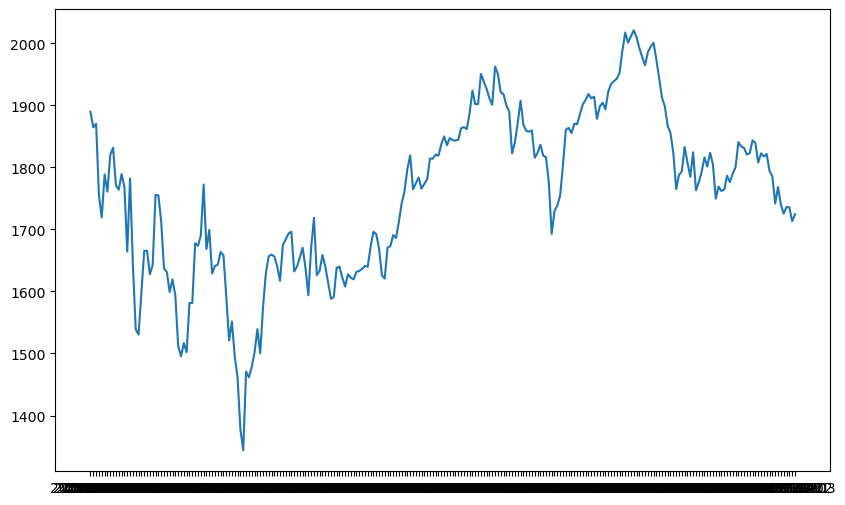

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Close']) # 폐장 시 가격
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(data['Close'])
print(results)

(-2.3240671747795107, 0.1643232656725624, 0, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 2296.350131955975)


             Open        High         Low       Close   Adj Close      Volume
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean    -0.000454   -0.000449   -0.000403   -0.000367   -0.000367   -0.002717
std      0.023128    0.018227    0.020696    0.022281    0.022281    0.298235
min     -0.110622   -0.077844   -0.069751   -0.081424   -0.081424   -0.847730
25%     -0.010275   -0.008943   -0.012124   -0.009719   -0.009719   -0.201536
50%      0.001352    0.000221    0.001687    0.000982    0.000982   -0.010789
75%      0.010996    0.009430    0.012205    0.010076    0.010076    0.183396
max      0.070817    0.055051    0.064759    0.090254    0.090254    0.966807


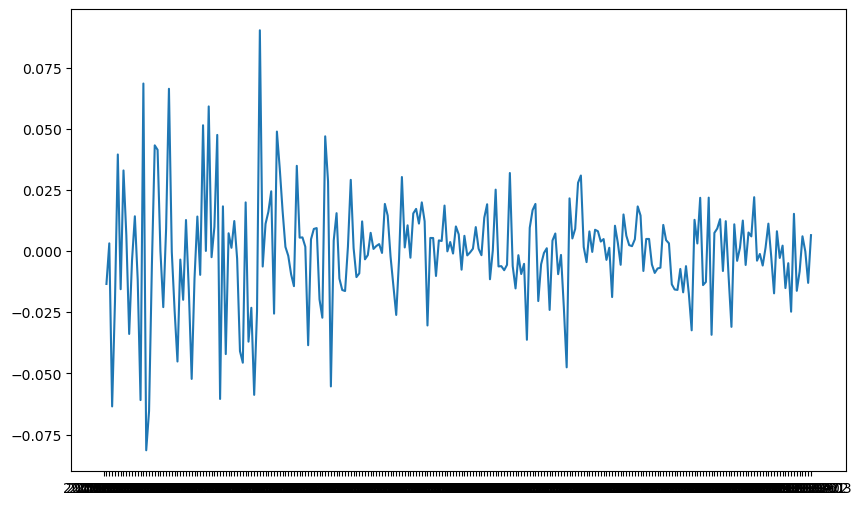

In [6]:
import numpy as np

datapct = data.pct_change()
logreturns = np.log(datapct+1)
print(logreturns.describe())

plt.figure(figsize=(10, 6))
plt.plot(logreturns['Close'])
plt.show()

In [8]:
logreturns = logreturns.dropna()
results = adfuller(logreturns['Close'])
print(results)

(-16.1666495724251, 4.408558450198708e-29, 0, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -1148.1497684204764)


In [11]:
logr1 = logreturns['Close'].values
print(logr1.shape)

logr = logr1.reshape(1, -1)
print(logr.shape)

inte = 14
x = []
y = []
for i in range(logr.shape[1]):
    if i + inte > logr.shape[1]-1:
        break
    else:
        xx = logr[0, i:i + inte]
        x.append(xx)
        yy = logr[0, i+inte]
        y.append(yy)
x = np.asarray(x)
y = np.asarray(y)
print(f"x: {x.shape}")
print(f"y: {y.shape}")

x_train = x[:210]
x_test = x[210:]
y_train = y[:210]
y_test = y[210:]

(249,)
(1, 249)
x: (235, 14)
y: (235,)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM

model = Sequential()
model.add(
    Dense(1, input_shape=(14, ))
)
model.summary()

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae']) # 연속형 시계열이므로 loss는 mse
model.fit(x_train, y_train, epochs=30, batch_size=32)

loss_acc = model.evaluate(x_train, y_train)
loss_test = model.evaluate(x_test, y_test)
print(loss_acc)
print(loss_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7/7 [==============================] - 0s 845us/step - loss: 0.0017 - mae: 0.0298
Epoch 2/30
7/7 [==============================] - 0s 457us/step - loss: 0.0017 - mae: 0.0292
Epoch 3/30
7/7 [==============================] - 0s 485us/step - loss: 0.0016 - mae: 0.0290
Epoch 4/30
7/7 [==============================] - 0s 444us/step - loss: 0.0016 - mae: 0.0287
Epoch 5/30
7/7 [==============================] - 0s 415us/step - loss: 0.0016 - mae: 0.0284
Epoch 6/30
7/7 [==============================] - 0s 497us/step - loss: 0.0016 - mae: 0.0282
Epoch 7/30
7/7 [==============

2024-11-11 22:14:25.995513: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 0s 460us/step - loss: 0.0011 - mae: 0.0238
Epoch 27/30
7/7 [==============================] - 0s 374us/step - loss: 0.0011 - mae: 0.0235
Epoch 28/30
7/7 [==============================] - 0s 371us/step - loss: 0.0011 - mae: 0.0234
Epoch 29/30
7/7 [==============================] - 0s 321us/step - loss: 0.0011 - mae: 0.0232
Epoch 30/30
1/1 [==============================] - 0s 8ms/step - loss: 2.4776e-04 - mae: 0.0141
[0.0010171844623982906, 0.022720443084836006]
[0.0002477568341419101, 0.014052595011889935]


In [13]:
model2 = Sequential()
model2.add(
    Dense(32, activation='relu', input_shape=(14, ))
)
model2.add(Dense(1))
model2.summary()

model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.fit(x_train, y_train, epochs=30, batch_size=32)

loss_acc2 = model2.evaluate(x_train, y_train)
loss_test2 = model2.evaluate(x_test, y_test)
print(loss_acc2)
print(loss_test2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7/7 [==============================] - 0s 630us/step - loss: 8.4334e-04 - mae: 0.0211
Epoch 2/30
7/7 [==============================] - 0s 522us/step - loss: 7.0316e-04 - mae: 0.0190
Epoch 3/30
7/7 [==============================] - 0s 514us/step - loss: 6.4481e-04 - mae: 0.0181
Epoch 4/30
7/7 [==============================] - 0s 503us/step - loss: 6.0870e-04 - mae: 0.0176
Epoch 5/30
7/7 [==============================] - 0s 471us/step 

In [14]:
x_train = x_train.reshape(-1, 1, 14) # RNN 적용을 위해 (sample, timestep, feature)로 변환
x_test = x_test.reshape(-1, 1, 14)

rnn = Sequential()
rnn.add(LSTM(32, input_shape=(1, 14)))
rnn.add(Dense(1))
rnn.summary()

rnn.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
rnn.fit(x_train, y_train, epochs=30, batch_size=32)

loss_acc3 = rnn.evaluate(x_train, y_train)
loss_test3 = rnn.evaluate(x_test, y_test)
print(loss_acc3)
print(loss_test3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                6016      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


2024-11-11 22:20:43.041475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 22:20:43.041882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 22:20:43.042424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 1ms/step - loss: 5.2230e-04 - mae: 0.0163
Epoch 2/30
7/7 [==============================] - 0s 861us/step - loss: 4.8528e-04 - mae: 0.0155
Epoch 3/30
7/7 [==============================] - 0s 824us/step - loss: 4.8640e-04 - mae: 0.0156
Epoch 4/30
7/7 [==============================] - 0s 850us/step - loss: 4.9070e-04 - mae: 0.0155
Epoch 5/30
7/7 [==============================] - 0s 825us/step - loss: 4.8247e-04 - mae: 0.0158
Epoch 6/30
7/7 [==============================] - 0s 847us/step - loss: 4.7133e-04 - mae: 0.0153
Epoch 7/30
7/7 [==============================] - 0s 764us/step - loss: 4.7244e-04 - mae: 0.0155
Epoch 8/30
7/7 [==============================] - 0s 863us/step - loss: 4.8661e-04 - mae: 0.0155
Epoch 9/30
7/7 [==============================] - 0s 873us/step - loss: 4.6762e-04 - mae: 0.0154
Epoch 10/30
7/7 [==============================] - 0s 909us/step - loss: 4.6790e-04 - mae: 0.0153
Epoch 11/30
7/7 [=========================

2024-11-11 22:20:43.826097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 22:20:43.826746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 22:20:43.827219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [15]:
gru = Sequential()
gru.add(GRU(32, input_shape=(1, 14)))
gru.add(Dense(1))
gru.summary()

gru.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
gru.fit(x_train, y_train, epochs=30, batch_size=32)

loss_acc4 = gru.evaluate(x_train, y_train)
loss_test4 = gru.evaluate(x_test, y_test)
print(loss_acc4)
print(loss_test4)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                4608      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


2024-11-11 22:22:11.821720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 22:22:11.822357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 22:22:11.822644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 1ms/step - loss: 6.8312e-04 - mae: 0.0189
Epoch 2/30
7/7 [==============================] - 0s 908us/step - loss: 5.8452e-04 - mae: 0.0173
Epoch 3/30
7/7 [==============================] - 0s 926us/step - loss: 5.3908e-04 - mae: 0.0167
Epoch 4/30
7/7 [==============================] - 0s 862us/step - loss: 5.3543e-04 - mae: 0.0169
Epoch 5/30
7/7 [==============================] - 0s 918us/step - loss: 5.1088e-04 - mae: 0.0159
Epoch 6/30
7/7 [==============================] - 0s 867us/step - loss: 5.0520e-04 - mae: 0.0162
Epoch 7/30
7/7 [==============================] - 0s 857us/step - loss: 4.8189e-04 - mae: 0.0156
Epoch 8/30
7/7 [==============================] - 0s 828us/step - loss: 4.7698e-04 - mae: 0.0156
Epoch 9/30
7/7 [==============================] - 0s 835us/step - loss: 5.2156e-04 - mae: 0.0168
Epoch 10/30
7/7 [==============================] - 0s 838us/step - loss: 4.9012e-04 - mae: 0.0156
Epoch 11/30
7/7 [=========================

2024-11-11 22:22:12.617782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 22:22:12.618297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 22:22:12.618812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus